In [1]:
import pandas as pd

import warnings
warnings.simplefilter('ignore')

In [2]:
# Importing the Dataset

df = pd.read_csv(r'clean.csv')
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,14.584667,0,0,0,10.133669,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,2.110477,0,0,0,12.756862,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,0.009966,0,0,0,9.753931,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,14.248198,0,0,0,12.386097,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,7.679823,0,0,0,12.069057,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35590,3,0,2,6,0,9.853082,0,0,0,15.623157,...,0,0,1,0,0,0,0,0,0,1
35591,2,0,1,3,0,14.685521,0,0,0,11.858268,...,0,0,0,0,0,0,0,0,0,1
35592,2,0,2,6,0,12.379835,0,0,0,12.294440,...,0,0,0,0,0,0,0,0,0,1
35593,2,0,0,3,0,8.664374,0,0,0,12.069057,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Seperating the Dependent and Independent variables

X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [4]:
# Balance the Imbalance data

from imblearn.under_sampling import RandomUnderSampler

rs = RandomUnderSampler(random_state=17)
x_new,y_new = rs.fit_resample(X,y)

In [5]:
# Seperate the Data into Train and Test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,train_size=0.8,random_state=17)

In [6]:
# Build the base model

from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state=17)

In [7]:
estimator.fit(x_train,y_train)

DecisionTreeClassifier(random_state=17)

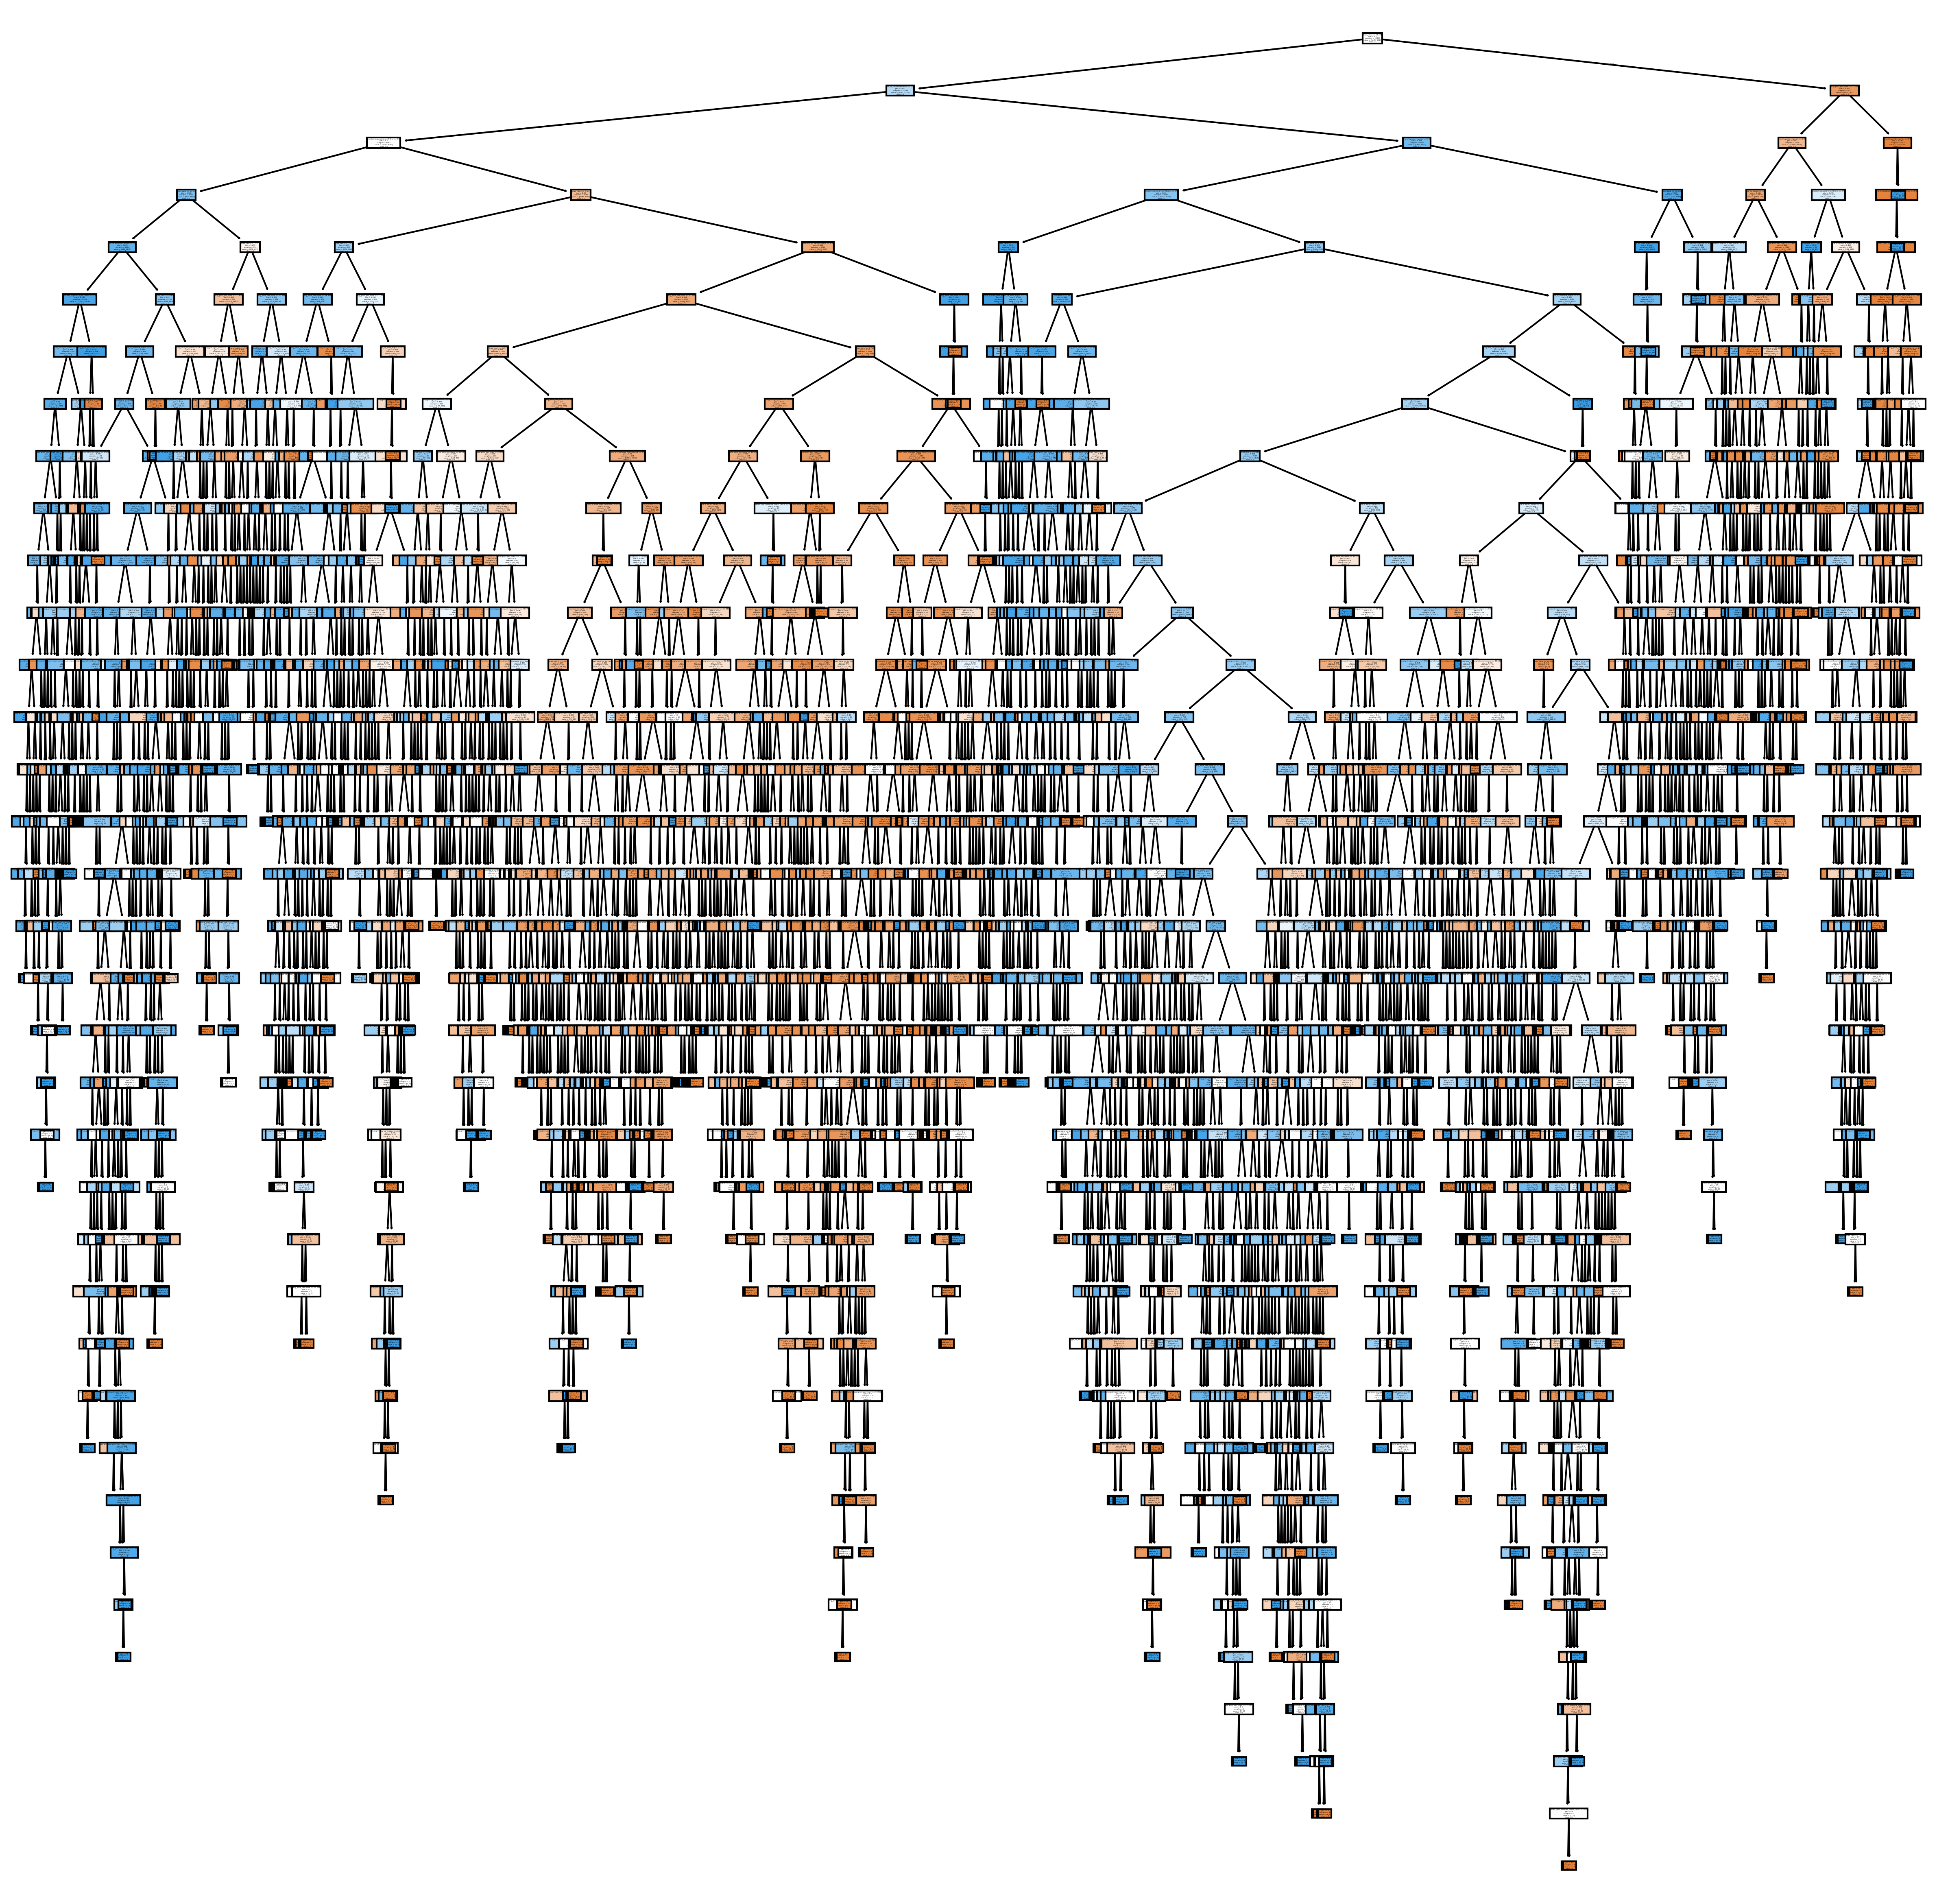

In [8]:
# Plot the tree to see the depth of the tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20),dpi=300)

plot_tree(estimator,filled=True,feature_names=x_train.columns.tolist(),class_names=['0','1'])
plt.show()

In [12]:
# Apply HyperParameter Tunning to find the best parameter

estimator = DecisionTreeClassifier(random_state=17)

param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,35))}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

info = grid.best_estimator_
info

DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=17)

In [13]:
# Features that are important for building the model

features = pd.DataFrame(data = info.feature_importances_,columns=['Importances'],index=x_train.columns)

imp_feat = features[features['Importances']>0].index.tolist()
imp_feat

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'repeated_guest',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'type_of_meal_plan_Meal Plan 2',
 'type_of_meal_plan_Not Selected',
 'room_type_reserved_Room_Type 2',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 5',
 'room_type_reserved_Room_Type 6',
 'room_type_reserved_Room_Type 7',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online']

In [14]:
# create the data with the important features
# Evaluate the model with best estimator

x_train_new = x_train[imp_feat]
x_test_new = x_test[imp_feat]

rf = grid.best_estimator_
rf.fit(x_train_new,y_train)

from sklearn.metrics import accuracy_score

ypred_train = rf.predict(x_train_new)
print('Train Accuracy is :',accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print('cross validation score is :',cross_val_score(rf,x_train_new,y_train,cv=5,scoring='accuracy').mean())

ypred_test = rf.predict(x_test_new)
print('Test Accuracy is :',accuracy_score(y_test,ypred_test))

Train Accuracy is : 0.8912125052809463
cross validation score is : 0.8376633757067543
Test Accuracy is : 0.8527672158850866
